# Imputing

Let's impute the missingness away!

In this Notebook we will have a look at various imputation methods and compare their results and performances.  
Compared imputation methods:
 + LOCF (last observed carried forward)
 + NOCB (next observation carried backward)
 + Mean imputation
 + Median imputation
 + BRITS (Single imputation)
 + SAITS (Single imputation)
 + mTAN (Multiple imputation)


In [5]:
%load_ext autoreload
%autoreload 2

from toy_dataset import data_utils
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home2/joshua.wendland/Documents/sepsis/sepsis_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Dataset

Here we create mcar missingness.


In [6]:
name = 'toydataset_small'
path = data_utils.datasets_dict[name]['path']
dataset = data_utils.ToyDataDf(path)

error_dict = dict()
# The missingness ratios to be evaluated
missingness = np.linspace(0.1,0.9,9)
# How many times should the imputation be repeated (and then take average)
repeat_imputation = 100

# Simple Imputations
 
Next we are looking at these basic imputation methods.

+ Mean
+ Median
+ LOCF
+ NOCB

As the data in a time series can be subject to different phenomena, the different basic imputation methods perform different depending on the phenomena. These phenomena can be:  

+ no trend or seasonality (fig1)
+ has trend, but no seasonality (fig2)
+ has seasonality, but no trend (fig3)
+ has both trend and seasonality (fig4)

<center>
    <img src="https://www.kaggleusercontent.com/kf/1924745/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..PhbwefajbtA-A0DXFrb2wg.UVB5orqrpslXWr9Bw-7gSalXdzYrqEYkRxTVIX43RGAp5Jp05W7oDH18dLxcTxcI92OlgkHnzYUJ6GQpdgRfvqJkBgy-UMl8g7OJ_U3ioeBIE9hD2OnhUfsHk4nByvHpfGG9tbE1EFgDgkssrvBXrpm_fiJ22sQ-yRi-DlCNJKfPE7pj8mVcESw2BA7CezJn1WXEItaCIdgqWbwRS4geOjOOl3BlY-vfV5r66dNbApL7ttC587gnIfdkG71AjMA0y-VHhfxrk4axcgmWJ5jFPfb0ZFx8W8lLByaMZxxxpZ26Y3j1jRLlk9AthhrcQhVoiHdqA-7JwFBeybkyAeA7LO6tMy0MHQ6iU0bhPgMkuB2IJY5DhanvAVeD8DZfaaUSWysx-jBVUE4RraBpVXJZirSJek6r3CyqRavIHQoIluUBGLPDNm1abW-k7w_1gR-5ZM072a8BlgFUzjsZvDK469VrCRQa-TQ9WhpaK1TbCnTeWSD02sSEAX5VMsFHZ0z1jtA1KKbSelt8hjKFGfWWevO85xccmtGltPz-cWGmxIaazoLyMQ4k2ZJqThSBlYPltGD5F0yl9rPGOpz77ErFnhIWZmIgoQJbNRkqzxIZvtTIZs0LjAUWJplF2hoP_KOZf07GysFwerkZsX_xz-19dt3MkWgVfpfWisaCfHUS-IYl0NrG54rKco__fjBac0_q.exxO0U1aYlTCABkuSntLzA/__results___files/figure-html/unnamed-chunk-1-1.png" alt="" style="width:500px;height:350px;"> 
    <br>
    Image from <a href="https://www.kaggle.com/code/juejuewang/handle-missing-values-in-time-series-for-beginners/report">Kaggle</a>.

</center>




### Mean Imputation

The dataset is a collection of many individual time series, which can potentially have different lengths. Missing values are filled with the mean of the *corresponding time series*.

In [15]:
name = 'mean'
impute_func = dataset.impute_mean
error_dict = dataset.get_mse_impute(name, error_dict, impute_func, missingness, repeat_imputation)

100%|██████████| 9/9 [00:19<00:00,  2.17s/it]


### Median Imputation

Same as for Mean Imputation, the mean is calculated for each time series.

In [16]:
name = 'median'
impute_func = dataset.impute_median
error_dict = dataset.get_mse_impute(name, error_dict, impute_func, missingness, repeat_imputation)

100%|██████████| 9/9 [00:23<00:00,  2.56s/it]


### LOCF Imputation

In [17]:
name = 'LOCF'
impute_func = dataset.impute_LOCF
error_dict = dataset.get_mse_impute(name, error_dict, impute_func, missingness, repeat_imputation)

100%|██████████| 9/9 [00:17<00:00,  1.91s/it]


### NOCB Imputation

In [18]:
name = 'NOCB'
impute_func = dataset.impute_NOCB
error_dict = dataset.get_mse_impute(name, error_dict, impute_func, missingness, repeat_imputation)

100%|██████████| 9/9 [00:17<00:00,  1.90s/it]


# More sophisticated Imputation methods

Let us look at more sophisticated imputation methods, such as Single Imputation methods, that try to approximate the conditional mean: 

$$\mathbb{E} [ ~ p(X_\text{miss} | X_\text{obs}, \theta) ~ ]  \qquad \leftarrow \text{Cond. mean} \quad$$ 

On the other hand we also look at a Multiple Imputation method, that does not try to approximate the conditional mean, but the entire probability density function:

$$X_\text{miss} \sim ~ p(X_\text{miss} | X_\text{obs}, \theta)$$


## Single Imputation

We look at the following Single Imputation methods:

+ SAITS
+ BRITS

### SAITS

In [19]:
name = 'SAITS'
impute_func = dataset.impute_SAITS
error_dict = dataset.get_mse_impute(name, error_dict, impute_func, missingness, repeat_imputation)

100%|██████████| 9/9 [00:06<00:00,  1.38it/s]


### BRITS

In [20]:
name = 'BRITS'
impute_func = dataset.impute_BRITS
error_dict = dataset.get_mse_impute(name, error_dict, impute_func, missingness, repeat_imputation)

100%|██████████| 9/9 [00:22<00:00,  2.51s/it]


# Multiple Imputation - mTAN

We will look at the **mTAN** imputation.

# Visualize results


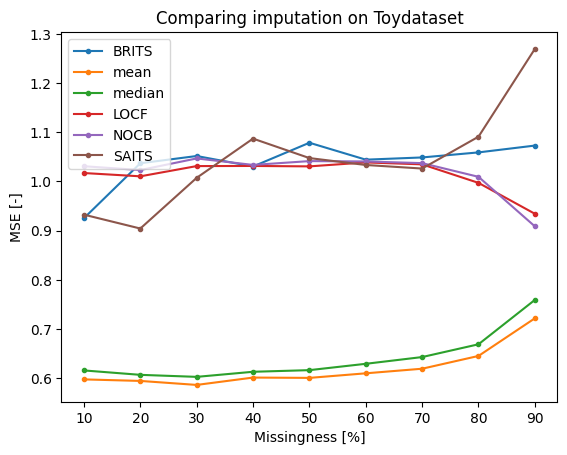

In [21]:
fig = plt.figure()
plt.title(f'Comparing imputation on {dataset.name}')
plt.ylabel('MSE [-]')
plt.xlabel('Missingness [%]')
for key in error_dict.keys():
    print(key)
    plt.plot(missingness*100, error_dict[key], marker='o', ms=3, label=key)
plt.legend(loc='best')
plt.show()
